In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
YEARS = range(2014,2019)
files = ['./data/'+str(x)+'_Financial_Data.csv' for x in YEARS]
dfs = [pd.read_csv(f) for f in files]

Text(0.5, 1.0, 'N. of samples per year')

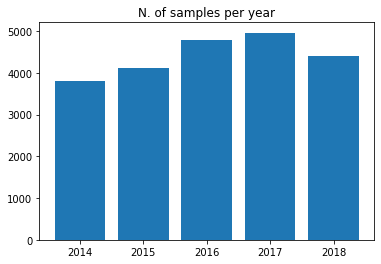

In [3]:
samples_per_year = [len(df) for df in dfs]
plt.bar(YEARS, samples_per_year)
plt.title("N. of samples per year")

In [4]:
total = None
for i, df in enumerate(dfs):
    price_var_column = dfs[i].columns[-2]
    renamed = {price_var_column: "PRICE VAR [%]", 'Unnamed: 0': 'Stock'}
    dfs[i] = dfs[i].rename(columns=renamed)
    to_drop = ['operatingCycle', 'cashConversionCycle', 'operatingProfitMargin']
    dfs[i] = dfs[i].drop(to_drop, axis=1)
    dfs[i]['Year'] = 2014+i
    if i == 0:
        total = dfs[0]
        continue
    else:
        total = total.append(dfs[i], ignore_index=True)
total

,Stock,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,PRICE VAR [%],Class,Year
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0,2014
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0,2014
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1,2014
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1,2014
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22072,YRIV,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,...,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0,2018
22073,YTEN,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,...,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0,2018
22074,ZKIN,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,...,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0,2018
22075,ZOM,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,...,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,Industrials,-73.520000,0,2018


Stock                                             0
PRICE VAR [%]                                     0
Sector                                            0
Class                                             0
Year                                              0
                                              ...  
10Y Operating CF Growth (per Share)            9478
10Y Net Income Growth (per Share)              9532
10Y Revenue Growth (per Share)                 9532
10Y Shareholders Equity Growth (per Share)     9680
shortTermCoverageRatios                       10744
Length: 223, dtype: int64

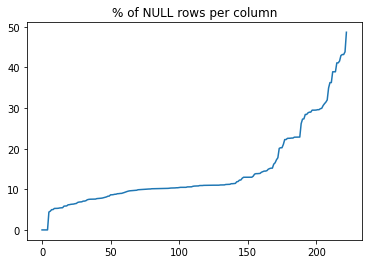

In [5]:
nulls_per_col = total.isnull().sum(axis=0).sort_values()
plt.plot(100*nulls_per_col.to_numpy() / len(total))
plt.title('% of NULL rows per column')
nulls_per_col

7484       0
8104       0
8100       0
20682      0
2567       0
        ... 
16293    218
11868    218
16296    218
16283    218
16602    218
Length: 22077, dtype: int64

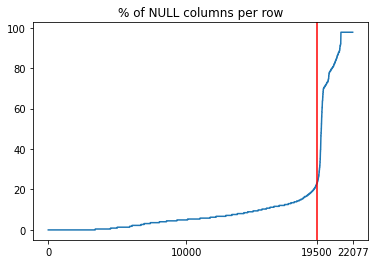

In [6]:
nulls_per_row = total.isnull().sum(axis=1).sort_values()
plt.plot(100*nulls_per_row.to_numpy() / len(total.columns))
plt.axvline(19500, color='red')
plt.xticks([0,10000,19500,len(total)])
plt.title('% of NULL columns per row')
nulls_per_row

In [17]:
## Drop rows (ordered by n. of NULL values) from 19500 onward
to_drop = len(total) - 19500
df = total.drop(nulls_per_row.tail(to_drop).index)

## Isolate numerical columns
# excluded columns are all non-float columns + PRICE VAR [%] column
excluded_cols = ['Stock', 'Sector', 'Class', 'Year', 'PRICE VAR [%]']
num_cols = [c for c in df.columns if c not in excluded_cols]
num_df = df[num_cols]

## Normalization
num_df = (num_df - num_df.mean()) / num_df.std()

## Log transformation
# normalized cols --> negative median is equal to skewness value
cols_skewness = -num_df.median()
pos_skewed_cols = num_df.columns[cols_skewness > 0.05]
neg_skewed_cols = num_df.columns[cols_skewness < -0.05]

num_df[neg_skewed_cols] = -num_df[neg_skewed_cols]
skewed_cols = list(pos_skewed_cols) + list(neg_skewed_cols)
for c in skewed_cols:
    num_df[c] = np.log(num_df[c] - min(num_df[c]) + 0.01)

## Imputation

imp_mean = IterativeImputer(random_state=0,max_iter=20)

left_bound = 0
left_size = 5
right_size = 5

# cols must be num_cols but in the same order they appear in nulls_per_col
cols = [c for c in nulls_per_col.index if c in num_cols]

#Reorder columns
for left_bound in range (0,len(cols)-right_size-left_size+1,right_size+left_size):
    cols = cols[left_bound:left_bound+left_size] + cols[:left_bound] + cols[left_bound+left_size:]
    cols = cols[-right_size:] + cols[:-right_size]

#Fills the nulls within a integer-only matrix
table_only_integers = num_df[cols].to_numpy()
for i in range(0, len(cols)-left_size-right_size, left_size+right_size):
    subtable = table_only_integers[:,i:i+left_size+right_size]
    subtable = imp_mean.fit_transform(subtable)
    table_only_integers[:,i:i+left_size+right_size] = subtable
    print(f"Imputing is completed up to {i+left_size+right_size-1}th column")
subtable = table_only_integers[:,-left_size-right_size:]
subtable = imp_mean.fit_transform(subtable)
print("Imputing is completed up to last column")
table_only_integers[:,-left_size-right_size:] = subtable

#Replace with filled nulls
for i,col in enumerate(num_cols):
    num_df[col] = table_only_integers[:,i]


## Normalization
num_df = (num_df - num_df.mean()) / num_df.std()

df[num_cols] = num_df

df.to_csv('./data/Financial_Data.csv',index=False)

Imputing is completed up to 9th column
Imputing is completed up to 19th column
Imputing is completed up to 29th column
Imputing is completed up to 39th column
Imputing is completed up to 49th column
Imputing is completed up to 59th column
Imputing is completed up to 69th column
Imputing is completed up to 79th column
Imputing is completed up to 89th column
Imputing is completed up to 99th column
Imputing is completed up to 109th column
Imputing is completed up to 119th column
Imputing is completed up to 129th column
Imputing is completed up to 139th column
/Users/michelebersani/opt/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
Imputing is completed up to 149th column
Imputing is completed up to 159th column
Imputing is completed up to 169th column
Imputing is completed up to 179th column
Imputing is completed up to 189th column
Imputing is co